##**Assignment1**

**Download any RGB image from google or any other legal site and perform the following tasks in stepwise manner:
Using OpenCV**

1) Read and display the image in RGB format

2) Resize the image to (256,256) or (512,512) as per your choice

3)Implement the following functions Without Using OpenCV (from scratch):
Convert the image from:

     a) RGB - CMY
     b) CMY - RGB
     c) RGB - HSV
     d) HSV - RGB
     e) RGB - YIQ
     f) YIQ - RGB
     g) RGB - YUV
     h) YUV - RGB

Link to the Image Used in the code : [Nature And Landscapes](https://www.istockphoto.com/essential/photo/mountain-landscape-gm517188688-89380423)

In [72]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [73]:
img = cv2.imread('example_img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [74]:
img = cv2.resize(img,(512,512))

In [75]:
img.shape

(512, 512, 3)

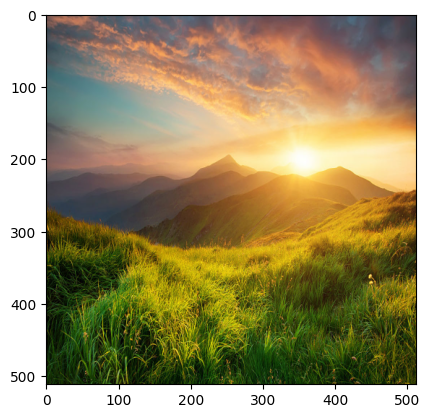

In [76]:
plt.imshow(img)

**This Image is in RGB format. We will convert it into the formats specified above from scratch without using OpenCV**

##**1.RGB TO CMY**

Cyan, Magenta and Yellow(CMY) are complement to Red, Green and Blue(RGB)so we can subtract the values in each colour channel of RGB from 255 to get the colour channel values of CMY

In [77]:
img_cmy = 255 - img

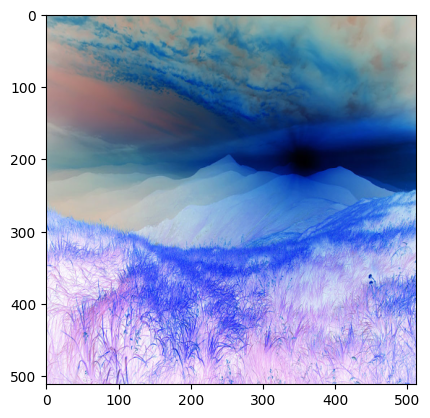

In [78]:
plt.imshow(img_cmy)

##**CMY TO RGB**

Now as explained above, RGB and CMY are complement of each other, so we can again just subtract cmy image from 255 to rgb image

In [79]:
img_rgb = 255 - img_cmy

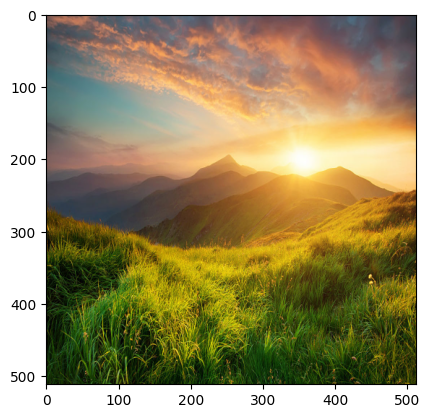

In [80]:
plt.imshow(img_rgb)

##**RGB TO HSV**

HSV stands for Hue Saturation and Value, where hue means a particular variety of a color, Saturation means purity or intensity of a colour and Value is the brightness of a colour. Here is how Hue, Saturation and Value(H,S,V) are related with R,G,B values :

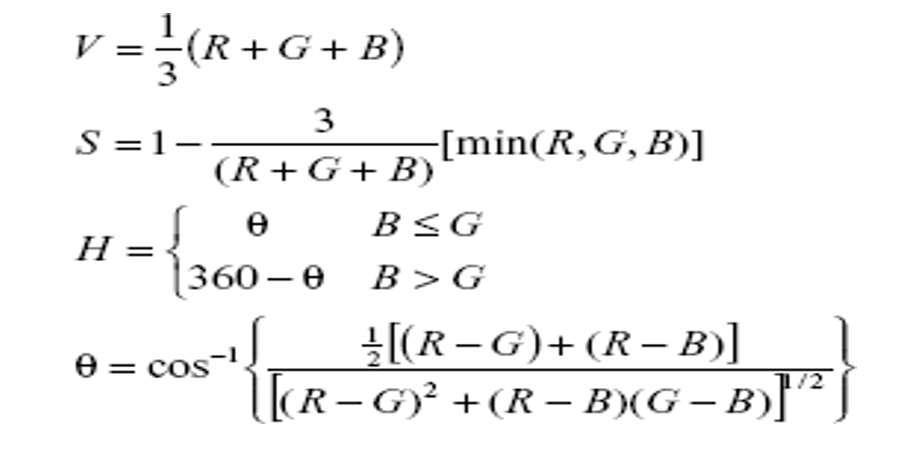

In [81]:
r = img[:,:,0]/255.0    #Normalized pixel values of red colour channel
g = img[:,:,1]/255.0    #Normalized pixel values of green colour channel
b = img[:,:,2]/255.0    #Normalized pixel values of blue colour channel

In [82]:
v = (r + g + b) / 3   #Value of each pixel of HSV image

In [83]:
s = ((1 - (3*np.minimum(np.minimum(r, g), b))/(r + g + b)))   #Saturation of each pixel of HSV image

<ipython-input-83-f5eb66fc06f2>:1: RuntimeWarning: invalid value encountered in divide
  s = ((1 - (3*np.minimum(np.minimum(r, g), b))/(r + g + b)))   #Saturation of each pixel of HSV image


In [84]:
theta_numerator = 0.5 * ((r - g) + (r - b))
theta_denominator = np.sqrt((r - g) ** 2 + (r - b) * (g - b))
theta_denominator[theta_denominator == 0] = 1e-6  #Handling zero denominators by making it a large value
theta = np.degrees(np.arccos(theta_numerator / theta_denominator))

Finding the hue values for each pixel making the hue values array by iterating through each pixel.

In [85]:
h = np.zeros((512,512))
for i, (br, gr, tr) in enumerate(zip(b, g, theta)):

  for j, (bc, gc, tc) in enumerate(zip(br, gr, tr)):

    if bc <= gc:
      h[i,j] = tc

    else:
      h[i,j] = 360 - tc

Denormalizing the Saturation and Value and converting all three(HSV) to unsigned int datatype

In [86]:
h = h.astype(np.uint8)
s = s*255
v = v*255
s = s.astype(np.uint8)
v = v.astype(np.uint8)

<ipython-input-86-81acc5dde1dd>:4: RuntimeWarning: invalid value encountered in cast
  s = s.astype(np.uint8)


In [87]:
img_hsv = np.dstack((h, s, v))

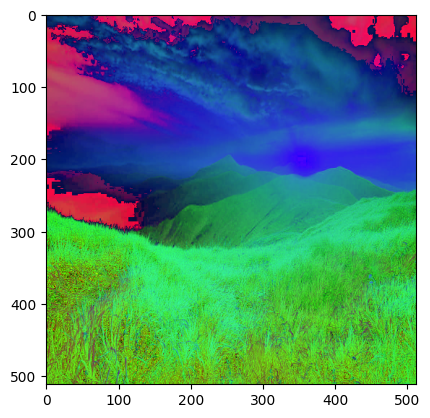

In [88]:
plt.imshow(img_hsv)

#HSV TO RGB

These are the steps to convert Hue Saturation and Value to RGB values :

---

**step 1** : Map the hue value to the corresponding colour in the RGB color wheel
  Hue value ranges from 0 to 360 and which corresponds to red to magenta in the RGB wheel. The RGB wheel can be categorized in six parts which contain primary(RGB) and secondary(CMY) colours.Below is a RGB colour wheel for visualization. We can observe that:

  sector 0:(0 deg t0 60 deg)    : Red

  sector 1:(61 deg t0 120 deg)  : Yellow

  sector 2:(121 deg t0 180 deg) : Green

  sector 3:(181 deg t0 240 deg) : Cyan

  sector 4:(241 deg t0 300 deg) : Blue

  sector 5:(301 deg t0 360 deg) : Magenta

  We can divide the RGB wheel by 60  and convert it to int to get each sector. This will give us the colour corresponding to the Hue value but to get a particular shade of a colour and intensity, we also have to use the saturation and the value component of the image.

---

**Step 2** : We have to smoothly interpolate between the primary and the secondary colours in a particular sector to find a particular a shade of the colour. for that we have the following formmulaes.

  fraction = h/360 - int(h/360) --> This fraction value is used tp find  a particular shade of the sector

  p = v * (1 - s)  --> Calculates the intensity of a color when the saturation is low.

  q = v * (1 - (s * fraction)) --> Calculates the intensity of the color
  when the hue is transitioning towards the next primary color.

  t = v * (1 - (s * (1 - fraction))) --> Calculates the intensity of the color when the hue is transitioning towards the previous primary color
  
  r, g, b = v, t, p  # Red sector

  r, g, b = q, v, p  # Yellow sector
  
  r, g, b = p, v, t  # Green sector
  
  r, g, b = p, q, v  # Cyan sector

  r, g, b = t, p, v  # Blue sector
  
  r, g, b = v, p, q  # Magenta sector

  explanation for this assignments :

---

  **Red Sector :**
  
  In this sector, the hue value corresponds to pure red.
  The red channel r is set to the value component v. Because value describes the intensity of the dominant colour

  The green channel g is set to the value t because it is transitioning from the previous primary colour, which is red

  The blue channel b is set to the value component p because blue colour has low intensity in the red sector

---

  **Yellow Sector :**

  In this sector, the hue value corresponds to shades transitioning from red to yellow.The red channel r is set to the value q because it is transitionning to the next colour, that is green.
  
  The green channel g is set to the value component v. Because it is the dominant colour in the sector
  
  The blue channel b is set to the value component p for the same reason as red sector.
  
---

  We can assign RGB value with pqv values with this method in all sectors.

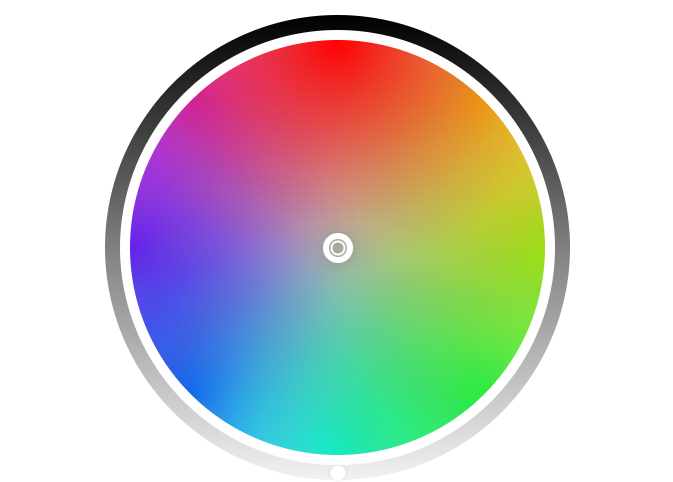

In [89]:
def hsv_to_rgb(h, s, v):
    sector = int(h / 60)
    fraction = (h / 60) - int(h / 60)

    p = v * (1 - s)
    q = v * (1 - (s * fraction))
    t = v * (1 - (s * (1 - fraction)))

    if sector == 0:
        r, g, b = v, t, p
    elif sector == 1:
        r, g, b = q, v, p
    elif sector == 2:
        r, g, b = p, v, t
    elif sector == 3:
        r, g, b = p, q, v
    elif sector == 4:
        r, g, b = t, p, v
    else:
        r, g, b = v, p, q

    r = int(r * 255)
    g = int(g * 255)
    b = int(b * 255)

    return r, g, b

In [90]:
h1 = img_hsv[:,:,0]
s1 = img_hsv[:,:,1]/255
v1 = img_hsv[:,:,2]/255

In [91]:
r1 = np.zeros((512, 512), dtype=np.uint8)
g1 = np.zeros((512, 512), dtype=np.uint8)
b1 = np.zeros((512, 512), dtype=np.uint8)

In [92]:
for i, (hr, sr, vr) in enumerate(zip(h1, s1, v1)):
  for j, (hue, sat, val) in enumerate(zip(hr, sr, vr)):
    r1[i][j], g1[i][j], b1[i][j] = hsv_to_rgb(hue, sat, val)

In [93]:
img_hsv_to_rgb = img_hsv = np.dstack((r1, g1, b1))

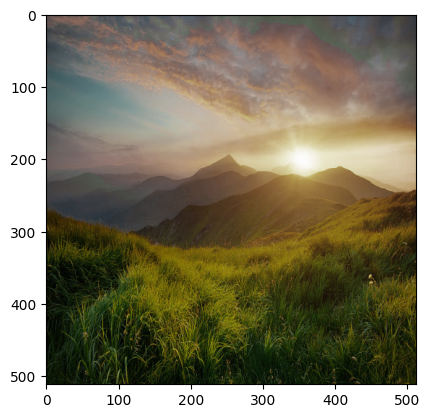

In [94]:
plt.imshow(img_hsv_to_rgb)

#RGB TO YIQ

In YIQ colour model the Y represents the Luminance and I and Q refers to chrominance of a colour. Below is simple way to converts RGB values to YIQ values.

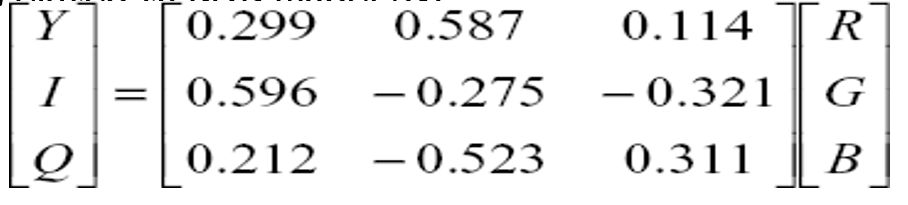

We will can apply these by formuales given below :

Y = 0.299 * R + 0.587 * G + 0.114 * B

I = 0.596 * R – 0.275 * G – 0.321 * B

Q = 0.212 * R – 0.523 * G + 0.311 * B

In [95]:
y = 0.299 * r + 0.587 * g + 0.114 * b
i = 0.596 * r - 0.275 * g - 0.321 * b
q = 0.212 * r - 0.523 * g + 0.311 * b

Denormalizing the YIQ values

In [96]:
img_yiq = np.dstack((y, i, q))

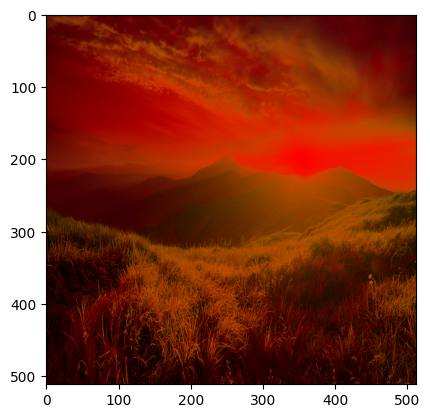

In [97]:
plt.imshow(img_yiq)

#YIQ TO RGB

Now to convert YIQ image to RGB image we can multiply YIQ matrix by inverse of the matrix by which we multiplied RGB matrix in above process.

In [98]:
y1 = 0.299 * r + 0.587 * g + 0.114 * b
i1 = 0.596 * r - 0.275 * g - 0.321 * b
q1 = 0.212 * r - 0.523 * g + 0.311 * b

In [99]:
inverse_yiq_matrix = np.linalg.inv(np.array([[0.299, 0.587, 0.114],
                                              [0.596, -0.275, -0.321],
                                              [0.212, -0.523, 0.311]]))

In [100]:
inverse_yiq_matrix

array([[ 1.        ,  0.95568806,  0.61985809],
       [ 1.        , -0.2715818 , -0.64687382],
       [ 1.        , -1.10817733,  1.70506456]])

In [101]:
r2 = (y1 + 0.956* i1 + 0.621 * q1)
g2 = (y1 - 0.272 * i1 - 0.647 * q1)
b2 = (y1 - 1.106 * i1 + 1.703 * q1)

In [102]:
img_yiq_to_rgb = np.dstack((r2, g2, b2))

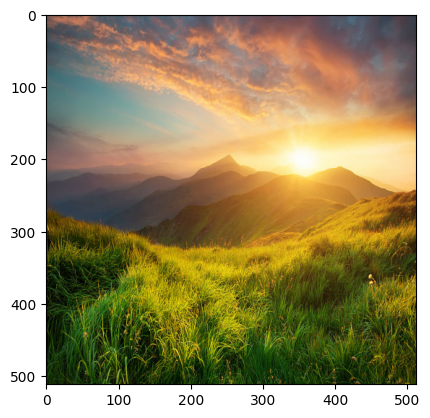

In [103]:
plt.imshow(img_yiq_to_rgb)

#RGB TO YUV

YUV colour model is similar to the YIQ colour model in which Y refers to luminance, same as the YIQ model, and U and V refer to the chrominance. following are the formulaes to convert RGB values to YUV values :

Y = 0.299 * R + 0.587 * G + 0.114 * B

U= -0.148 * R - 0.291 * G + 0.439 * B + (128/255)

V = 0.439 * R - 0.368 * G - 0.071 * B + (128/255)

We dont have to calculate the Y component as we already have it in the previous section

In [104]:
y2 = 0.299 * r + 0.587 * g + 0.114 * b
u2  = -0.148 * r - 0.291 * g + 0.439 * b + (128/255)
v2  = 0.439 * r - 0.368 * g - 0.071 * b + (128/255)

In [105]:
img_yuv = np.dstack((y2,u2,v2))

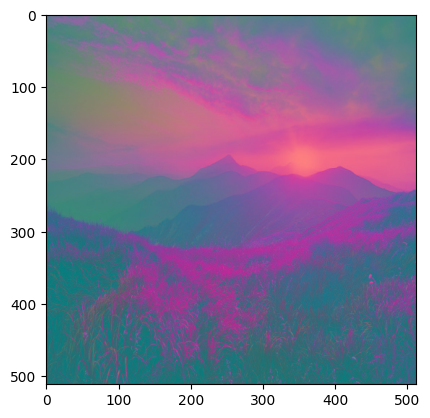

In [106]:
plt.imshow(img_yuv)

#YUV TO RGB

R = 1.164 * (Y - (16/255)) + 1.596 * (V - (128/255))

G = 1.164 * (Y - (16/255)) - 0.813 * (V - (128/255)) - 0.391 * (U - (128/255))

B = 1.164 * (Y - (16/255)) + 2.018 * (U - (128/255))


In [107]:
r3 = 1.164 * (y2 - (16/255)) + 1.596 * (v2 - (128/255))
g3 = 1.164 * (y2 - (16/255)) - 0.813 * (v2 - (128/255)) - 0.391 * (u2 - (128/255))
b3 = 1.164 * (y2 - (16/255)) + 2.018 * (u2 - (128/255))

In [108]:
img_yuv_to_rgb = np.dstack((r3, g3, b3))

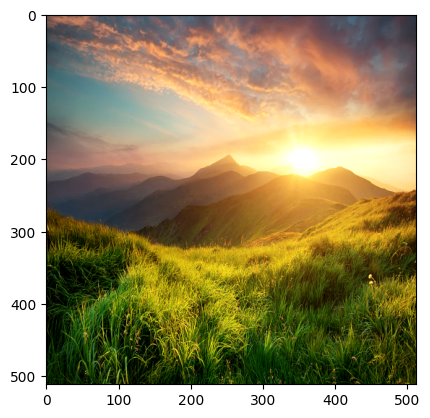

In [109]:
plt.imshow(img_yuv_to_rgb)